In [1]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np
DRAFTPATH = '/Users/cosinga/overleaf/higal_cross/figures/'
SAVEPATH = '/Users/cosinga/code/hcolor/fig_md_analysis/rvb/'
WEBPATH = '/Users/cosinga/code/calvinosinga.github.io/hicolor/sup_analysis/'
pplib.imports()

def fill_mean(ax, data, kwargs):
    x = data[0]
    y = np.mean(np.array([data[1], data[2]]), axis = 0)
    kwargs['alpha'] = 1
    ax.plot(x, y, **kwargs)
    return

In [9]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/12-29_pkdatasort.pkl', 'rb'))

ds.tickArgs(direction = 'in', right = True, top = True, labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 12, slc = (-1, -1))

ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center', va = 'top')

ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', fontsize = 16)
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67, 50])

ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            ['HI $\\times$ Red\nCross-Power', 'HI $\\times$ Blue\nCross-Power',
            'HI $\\times$ Galaxy\nCross-Power', r'Color Ratio'])
ds.displayAs('post_process', ['corr_coef', 'theory_bias', 'obs_bias'], 
             ['r', '$b_{\\mathrm{th}}$', '$b_{\\mathrm{obs}}$'])

ds.displayAs('simname', ['tng100', 'tng100-2', 'tng100-3'], ['TNG100', 'TNG100-2', 'TNG100-3'])
ds.setColors('color', ['red', 'blue', 'gray'], ['red', 'blue', 'resolved'])
ds.setColors('space', ['green', 'orange'], ['real', 'redshift'])
ds.setColors('HI_fieldname', ['firebrick', 'saddlebrown', 'sandybrown'], ['vn', 'hiptl', 'hisubhalo'])
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
snapshots.reverse()
ds.setColors('snapshot', 'viridis', snapshots)

ds.setXLabel(pplib.wnum())

# Simulation Resolution

The row values for snapshot: [99]
The column values for color: ['blue', 'red', 'resolved']


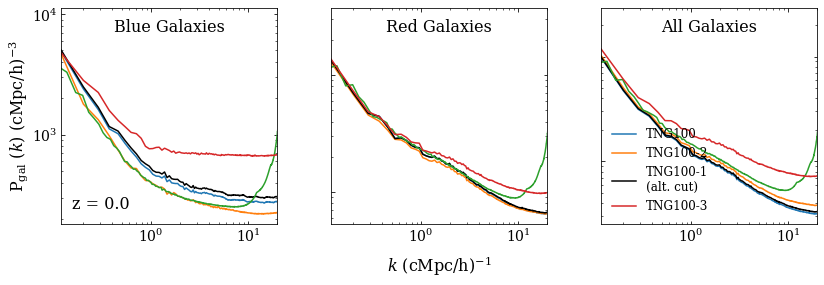

In [12]:
ip = {'is_auto':True, 'fieldname':'galaxy', 
      'axis':0, 'grid_resolution':800, 'color_cut':['0.60', 'None'], 
      'gal_res':['diemer', 'tng100-2'], 'snapshot':99,
      'gal_species':'stmass', 'sim_resolution':['low', 'medium', 'high'],
     'color':['blue', 'red', 'resolved'], 'space':'real', 'mas':'CICW',
     'censat':['no key found', 'both'], 'path':['fiducial', 'low-2', 'low-3', 'galbt']}

fg = ds.figrid('simname', 'snapshot', 'color', ip)
fg.colLabels(['Blue Galaxies', 'Red Galaxies', 'All Galaxies'])
# fg.plotArgs({'color':'blue'}, {'color':trgba('color', 'blue')})
# fg.plotArgs({'color':'red'}, {'color':trgba('color', 'red')})
# fg.plotArgs({'color':'resolved'}, {'color':'gray'})
fg.plotArgs({'gal_res':'tng100-2'}, {'color':'black', 'label':'TNG100-1\n(alt. cut)'})
# fg.axisArgs({'ylim':[1e2, 2e4]})
fg.legendArgs({'loc':'lower left'}, (0,2))
fg.setDefaultTicksParams()
fg.setYLabel(pplib.pklab('gal'))
fg.plot()


In [ ]:
ip = {'is_auto':True, 'fieldname':'vn', 
      'axis':0, 'grid_resolution':800, 'color_cut':['0.60', 'None'], 
      'gal_res':['diemer', 'tng100-2'], 'snapshot':99,
      'gal_species':'stmass', 'sim_resolution':['low', 'medium', 'high'],
     'color':['blue', 'red', 'resolved'], 'space':'real', 'mas':'CICW',
     'censat':['no key found', 'both'], 'path':['fiducial', 'low-2', 'low-3', 'galbt']}

The row values for snapshot: [99]
The column values for color: ['blue', 'red', 'resolved']


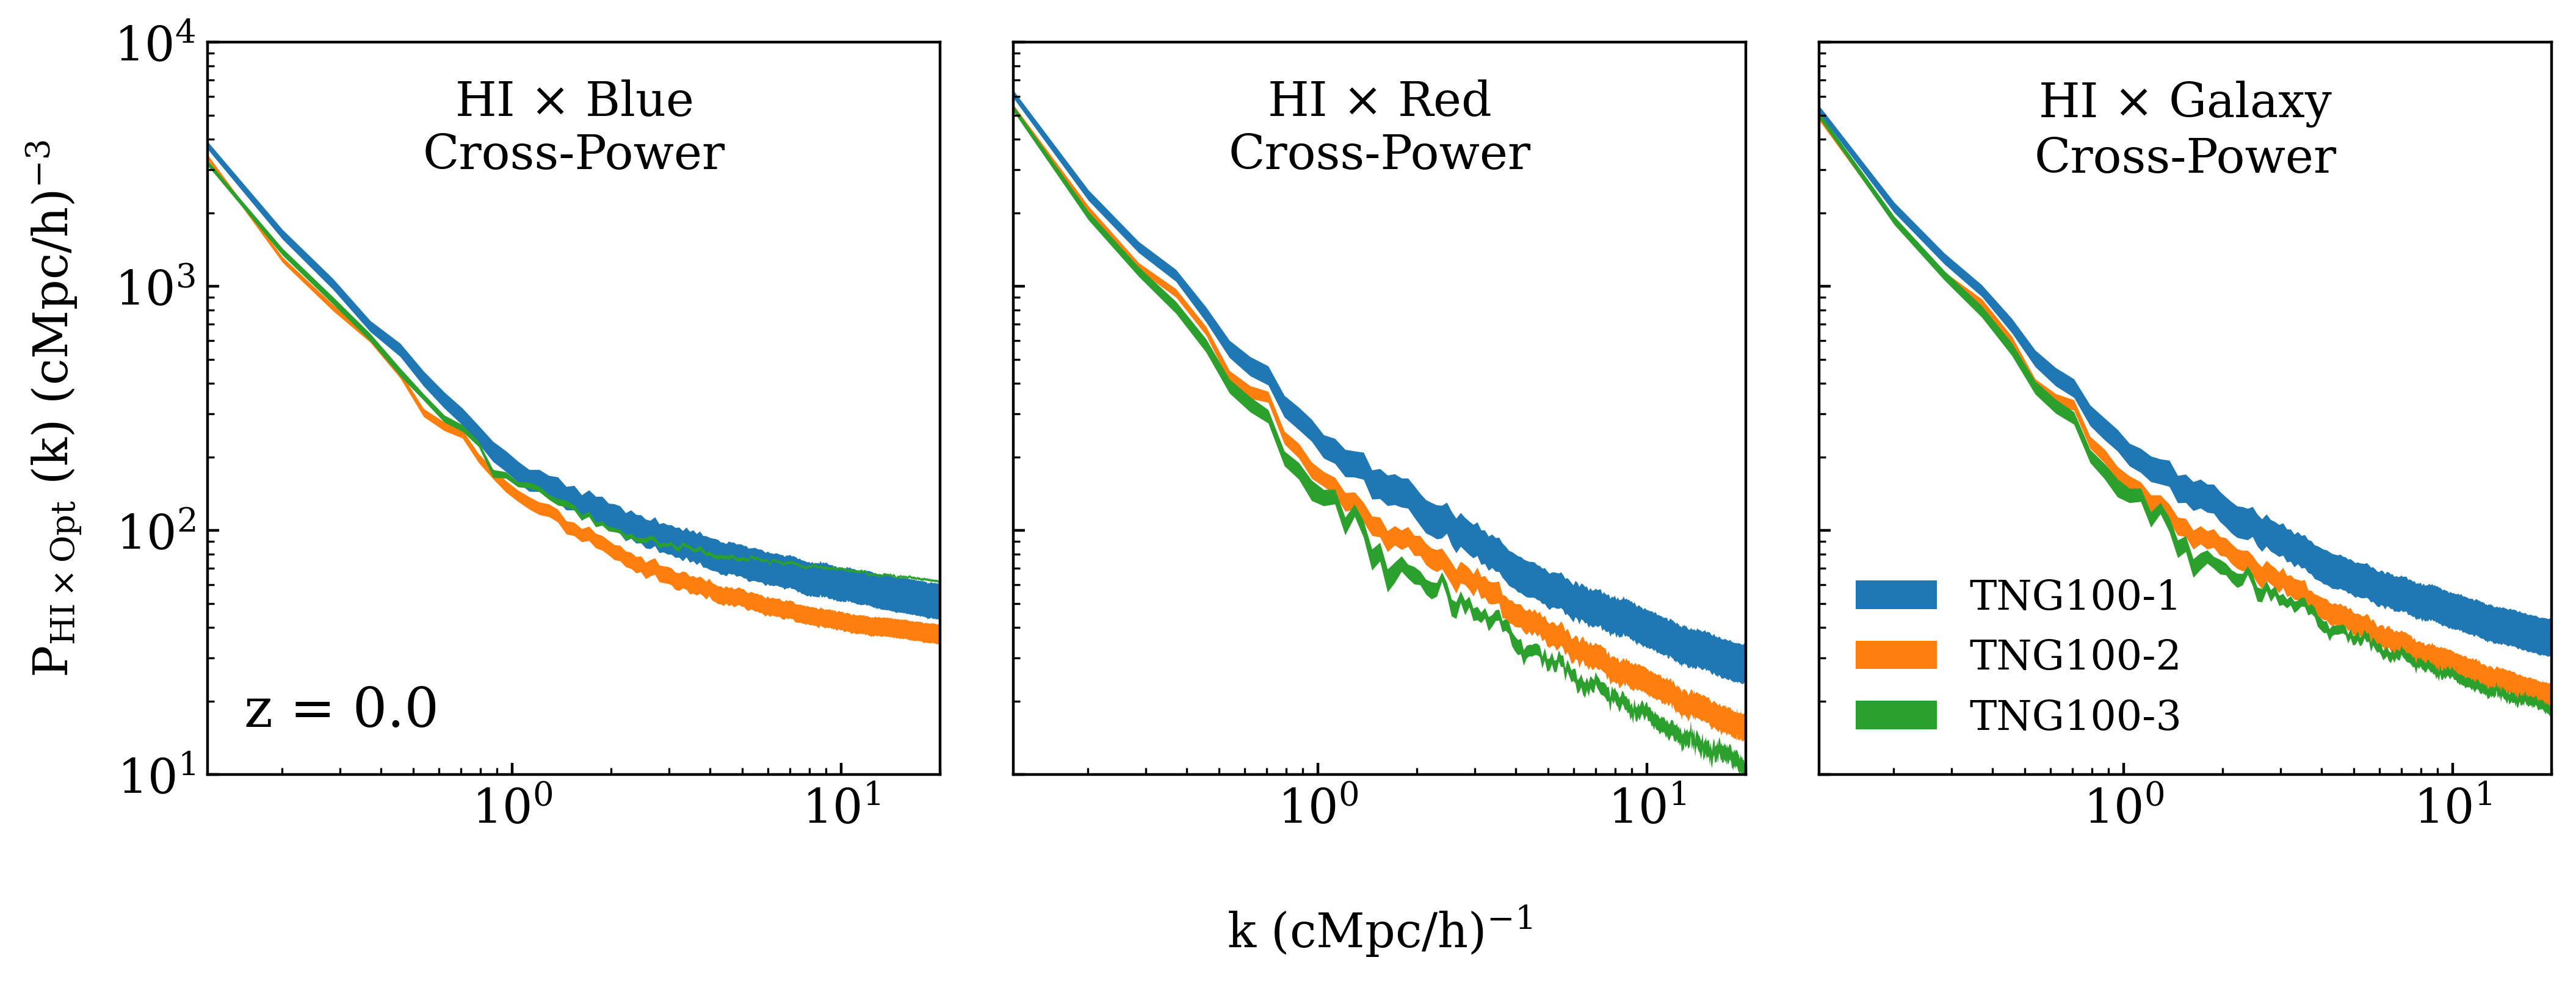

In [8]:
ip = {'is_auto':False, 'HI_fieldname':['hiptl', 'vn'], 
      'axis':0, 'grid_resolution':800, 'color_cut':['0.60', 'None'], 
      'gal_res':['diemer'], 'snapshot':99,
      'gal_species':'stmass', 'sim_resolution':['low', 'medium', 'high'],
     'color':['blue', 'red', 'resolved'], 'space':'real', 'mas':'CICW',
     'censat':['no key found', 'both'], 'path':['fiducial', 'low-2', 'low-3'],
     'post_process':'no key found'}

fg = ds.figrid('sim_resolution', 'snapshot', 'color', ip, figkw = {'dpi':400})
fg.autoFill()
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(10, 1e4)})
fg.tickArgs({'labelsize':14})
fg.legendArgs({'loc':'lower left'}, (0,2))
fg.plot()
fg.setXLabel(XLAB, txtargs = {'fontsize':14})
fg.setYLabel(YLAB%r"\mathrm{HI} \times \mathrm{Opt}", txtargs = {'fontsize':14})
fg.save("sim_resolution_HIXgalaxy_99.png")
fg.save(DRAFTPATH%"sim_resolution_HIXgalaxy_99.png")

In [5]:
ip['color'] = 'blue'
# ip['space'] = 'redshift'
# ds.printMatching(ip)